#### Etape 1: Récupération du HTML

In [1]:
import requests
r = requests.get('https://store.celio.com/')

'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\n<!--[if IE 9]>         <html class="no-js lt-ie9"><link rel="stylesheet" href="/sites/26/css/IE.css"><![endif]-->\n<html xmlns="http://www.w3.org/1999/xhtml" class="no-js" lang="fr-FR" xml:lang="fr-FR">\n    <!--<![endif]-->\n\n    <head>\n        <script type="text/javascript">\n            function trackOutboundLink(categorie, action, libelle, url) {\n                if(typeof ga !== \'undefined\')\n                {\n                    ga(\'send\', \'event\', categorie, action, libelle, {\'hitCallback\':\n                        function () {\n                            document.location = url;\n                        }\n                    });\n                }\n                else\n                    document.location = u
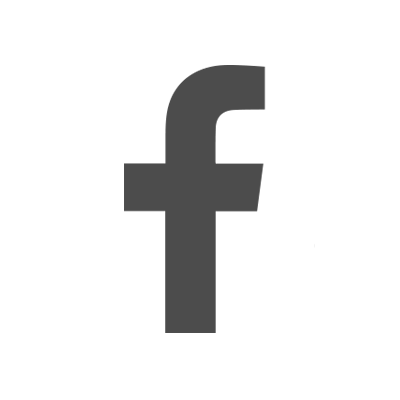

In [2]:
r.text #### donnée non structuré pour python

#### Etape 2: Parsing du text en html à l'aide de BeautifulSOup

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')

<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if gt IE 8]><!-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if IE 9]>         <html class="no-js lt-ie9"><link rel="stylesheet" href="/sites/26/css/IE.css"><![endif]-->
<html class="no-js" lang="fr-FR" xml:lang="fr-FR" xmlns="http://www.w3.org/1999/xhtml">
<!--<![endif]-->
<head>
<script type="text/javascript">
            function trackOutboundLink(categorie, action, libelle, url) {
                if(typeof ga !== 'undefined')
                {
                    ga('send', 'event', categorie, action, libelle, {'hitCallback':
                        function () {
                            document.location = url;
                        }
                    });
                }
                else
                    document.location = url;
            }
                        var 
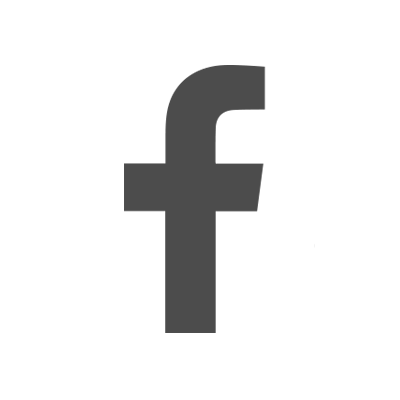

In [4]:
soup #### Reconnue comme du html

#### Etape 3 : Récupération des balises qui contiennent l'information pertinente

In [6]:
results = soup.find_all('a', attrs={'class':'footer_link'})
results #### Objet qui comprend l'ensemble des balises a d'attibues footer_link

[<a class="footer_link" href="https://store.celio.com/it/regione-veneto/provincia-di-verona/IT3183458/affi" onclick="trackOutboundLink('Store Locator', 'Liens', 'Clics sur Villes à proximité annuaire', 'https://store.celio.com/it/regione-veneto/provincia-di-verona/IT3183458/affi'); return false;" title="Magasins celio Affi">Magasins celio Affi</a>,
 <a class="footer_link" href="https://store.celio.com/fr/normandie/manche/50002/agneaux" onclick="trackOutboundLink('Store Locator', 'Liens', 'Clics sur Villes à proximité annuaire', 'https://store.celio.com/fr/normandie/manche/50002/agneaux'); return false;" title="Magasins celio Agneaux">Magasins celio Agneaux</a>,
 <a class="footer_link" href="https://store.celio.com/fr/occitanie/aude/11002/airoux" onclick="trackOutboundLink('Store Locator', 'Liens', 'Clics sur Villes à proximité annuaire', 'https://store.celio.com/fr/occitanie/aude/11002/airoux'); return false;" title="Magasins celio Airoux">Magasins celio Airoux</a>,
 <a class="footer_l

In [8]:
len(results) #### 506 balises au total

506

#### Etape 4: Création d'une liste avec l'ensemble des url des magasins

In [10]:
results[0]["href"] #### On isole l'url du premier magasin (premiere balise)

'https://store.celio.com/it/regione-veneto/provincia-di-verona/IT3183458/affi'

##### Généralisation à l'ensemble des magasins

In [11]:
for i in range(0,len(results)): #### POur chaque élement de la premiere balise à la derniere
    print(results[i]["href"]) ###  j'affiche l'url

https://store.celio.com/it/regione-veneto/provincia-di-verona/IT3183458/affi
https://store.celio.com/fr/normandie/manche/50002/agneaux
https://store.celio.com/fr/occitanie/aude/11002/airoux
https://store.celio.com/fr/provence-alpes-cote-d-azur/bouches-du-rhone/13001/aix-en-provence
https://store.celio.com/fr/corse/corse-du-sud/2A004/ajaccio
https://store.celio.com/fr/occitanie/tarn/81004/albi
https://store.celio.com/es/comunidad-valenciana/valencia/ES2522077/aldaia
https://store.celio.com/fr/auvergne-rhone-alpes/ain/1004/amberieu-en-bugey
https://store.celio.com/fr/centre/indre-et-loire/37003/amboise
https://store.celio.com/fr/hauts-de-france/somme/80021/amiens
https://store.celio.com/fr/centre/loiret/45004/amilly
https://store.celio.com/fr/pays-de-la-loire/maine-et-loire/49007/angers
https://store.celio.com/fr/auvergne-rhone-alpes/cantal/15005/anglards-de-saint-flour
https://store.celio.com/fr/nouvelle-aquitaine/pyrenees-atlantiques/64024/anglet
https://store.celio.com/fr/auvergne-rho

In [12]:
liste = []

for i in range(0,len(results)): #### POur chaque élement de la premiere balise à la derniere
    #print(results[i]["href"]) ###  j'affiche l'url
    liste.append(results[i]["href"]) #### Alimentation de la lsite par les url

In [14]:
len(liste)

506

#### Bilan

* Une liste avec les 506 url des magasins Célio

#### But:

* Pour chaque magasin, on cherche à récupérer les informations suivantes
    * Téléphone
    * Adresse
    * Code Postal
    * Nom magasin
    * Horaires d'ouvertures (option)

#### Etape 5: Isoler les élments sur le premier url

In [15]:
liste

['https://store.celio.com/it/regione-veneto/provincia-di-verona/IT3183458/affi',
 'https://store.celio.com/fr/normandie/manche/50002/agneaux',
 'https://store.celio.com/fr/occitanie/aude/11002/airoux',
 'https://store.celio.com/fr/provence-alpes-cote-d-azur/bouches-du-rhone/13001/aix-en-provence',
 'https://store.celio.com/fr/corse/corse-du-sud/2A004/ajaccio',
 'https://store.celio.com/fr/occitanie/tarn/81004/albi',
 'https://store.celio.com/es/comunidad-valenciana/valencia/ES2522077/aldaia',
 'https://store.celio.com/fr/auvergne-rhone-alpes/ain/1004/amberieu-en-bugey',
 'https://store.celio.com/fr/centre/indre-et-loire/37003/amboise',
 'https://store.celio.com/fr/hauts-de-france/somme/80021/amiens',
 'https://store.celio.com/fr/centre/loiret/45004/amilly',
 'https://store.celio.com/fr/pays-de-la-loire/maine-et-loire/49007/angers',
 'https://store.celio.com/fr/auvergne-rhone-alpes/cantal/15005/anglards-de-saint-flour',
 'https://store.celio.com/fr/nouvelle-aquitaine/pyrenees-atlantique

In [16]:
liste[0]

'https://store.celio.com/it/regione-veneto/provincia-di-verona/IT3183458/affi'

##### Application de la méthode

* A) Request sur le site web
* B) Parsing tu text en hml
* C) Récupération des balises adéquates
* D) Filtrer pour récupérer les bons élements
* E) Généralisation

#### A) Request sur le site web

In [18]:
r = requests.get(liste[0]) #### Récupère le hml du premier url et je le stocke dans la variable r

In [21]:
# r

In [22]:
# r.text

#### B) Parsing du text en html

<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if gt IE 8]><!-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if IE 9]>         <html class="no-js lt-ie9"><link rel="stylesheet" href="/sites/26/css/IE.css"><![endif]-->
<html class="no-js" lang="fr-FR" xml:lang="fr-FR" xmlns="http://www.w3.org/1999/xhtml">
<!--<![endif]-->
<head>
<script type="text/javascript">
            function trackOutboundLink(categorie, action, libelle, url) {
                if(typeof ga !== 'undefined')
                {
                    ga('send', 'event', categorie, action, libelle, {'hitCallback':
                        function () {
                            document.location = url;
                        }
                    });
                }
                else
                    document.location = url;
            }
                        var 
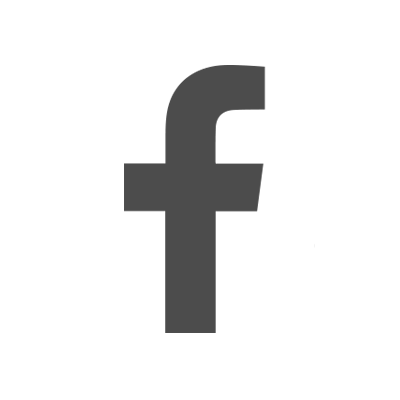

In [23]:
soup = BeautifulSoup(r.text, 'html.parser')
soup

#### C) Récupération des balises adéquates

In [24]:
results = soup.find_all('div', attrs={'class':'Information'})
results

[<div class="Information">
 <h3 class="c-subtitle-1" itemprop="name">
 <span class="brand">celio</span>
 <span class="city">Affi verona nord</span>
 </h3>
 <p class="adress-content" itemprop="address" itemscope="" itemtype="http://schema.org/PostalAddress">
 <span itemprop="streetAddress">
                                 Grand'Affi Shopping Center                                                                    <br/>
                                     Località Canove                                                            </span>
 <br/>
 <span itemprop="postalCode">37010</span>
 <span itemprop="addressLocality">AFFI</span>
 </p>
 <p class="telephone" itemprop="telephone">Tél : 04 5626 4253</p>
 <p class="horaires">Ouvert aujourd'hui de  09h à 21h</p>
 </div>]

In [26]:
len(results)  ### La balise information qui contient les élements recherchés

1

In [27]:
results[0]

<div class="Information">
<h3 class="c-subtitle-1" itemprop="name">
<span class="brand">celio</span>
<span class="city">Affi verona nord</span>
</h3>
<p class="adress-content" itemprop="address" itemscope="" itemtype="http://schema.org/PostalAddress">
<span itemprop="streetAddress">
                                Grand'Affi Shopping Center                                                                    <br/>
                                    Località Canove                                                            </span>
<br/>
<span itemprop="postalCode">37010</span>
<span itemprop="addressLocality">AFFI</span>
</p>
<p class="telephone" itemprop="telephone">Tél : 04 5626 4253</p>
<p class="horaires">Ouvert aujourd'hui de  09h à 21h</p>
</div>

#### D) Filtrer pour récupérer les bons élements

In [29]:
results[0].contents ##### Transformer la balise en liste (plusieurs élements ici)

['\n',
 <h3 class="c-subtitle-1" itemprop="name">
 <span class="brand">celio</span>
 <span class="city">Affi verona nord</span>
 </h3>,
 '\n',
 <p class="adress-content" itemprop="address" itemscope="" itemtype="http://schema.org/PostalAddress">
 <span itemprop="streetAddress">
                                 Grand'Affi Shopping Center                                                                    <br/>
                                     Località Canove                                                            </span>
 <br/>
 <span itemprop="postalCode">37010</span>
 <span itemprop="addressLocality">AFFI</span>
 </p>,
 '\n',
 <p class="telephone" itemprop="telephone">Tél : 04 5626 4253</p>,
 '\n',
 <p class="horaires">Ouvert aujourd'hui de  09h à 21h</p>,
 '\n']

In [30]:
len(results[0].contents) #### 9 élements au total

9

In [40]:
results[0].contents[1].contents[1].contents[0] #### Méthode .contents

'celio'

In [43]:
results[0].contents[1].contents[3].contents[0]

'Affi verona nord'

In [46]:
nom_mag = results[0].contents[1].contents[1].contents[0] +" " + results[0].contents[1].contents[3].contents[0]
nom_mag

'celio Affi verona nord'

#### Recherche de l'adresse

In [47]:
results[0].contents

['\n',
 <h3 class="c-subtitle-1" itemprop="name">
 <span class="brand">celio</span>
 <span class="city">Affi verona nord</span>
 </h3>,
 '\n',
 <p class="adress-content" itemprop="address" itemscope="" itemtype="http://schema.org/PostalAddress">
 <span itemprop="streetAddress">
                                 Grand'Affi Shopping Center                                                                    <br/>
                                     Località Canove                                                            </span>
 <br/>
 <span itemprop="postalCode">37010</span>
 <span itemprop="addressLocality">AFFI</span>
 </p>,
 '\n',
 <p class="telephone" itemprop="telephone">Tél : 04 5626 4253</p>,
 '\n',
 <p class="horaires">Ouvert aujourd'hui de  09h à 21h</p>,
 '\n']

In [56]:
#### Récupération des informations dans l'élement 3 (4 ème élement)
results[0].contents[3].contents[1].contents[0][1:]

"                                Grand'Affi Shopping Center                                                                    "

In [57]:
results[0].contents[3].contents[1].contents[2][1:]

'                                    Località Canove                                                            '

In [58]:
adresse = results[0].contents[3].contents[1].contents[0][1:] + results[0].contents[3].contents[1].contents[2][1:]
adresse

"                                Grand'Affi Shopping Center                                                                                                        Località Canove                                                            "

In [ ]:
#### Recherche du code postal

In [63]:
cp = results[0].contents[3].contents[5].text 
cp

'37010'

#### Recherche de la ville

In [68]:
ville = results[0].contents[3].contents[7].text
ville

'AFFI'

#### Recherche du téléphone

In [77]:
results[0].contents[5].text

'Tél : 04 5626 4253'

In [76]:
tel = results[0].contents[5].text[6:]
tel

'04 5626 4253'

#### Horaire d'ouverture

In [102]:
horaire = results[0].contents[7].text
horaire

"Ouvert aujourd'hui de  09h à 21h"

#### Synthèse des informations récupérées

In [103]:
nom_mag = results[0].contents[1].contents[1].contents[0] +" " + results[0].contents[1].contents[3].contents[0]
adresse = results[0].contents[3].contents[1].contents[0][1:] + results[0].contents[3].contents[1].contents[2][1:]
cp = results[0].contents[3].contents[5].text 
ville = results[0].contents[3].contents[7].text
tel = results[0].contents[5].text[6:]
horaire = results[0].contents[7].text

In [104]:
%whos

Variable        Type             Data/Info
------------------------------------------
BeautifulSoup   type             <class 'bs4.BeautifulSoup'>
adresse         str                                       <...>                         
content         generator        <generator object Tag.str<...>gs at 0x0000020E272A9EB0>
cp              str              37010
horaire         str              Ouvert aujourd'hui de  09h à 21h
i               int              505
line            str              AFFI
liste           list             n=506
liste_2         list             n=4
nom_mag         str              celio Affi verona nord
r               Response         <Response [200]>
requests        module           <module 'requests' from '<...>\\requests\\__init__.py'>
results         ResultSet        [<div class="Information"<...>e  09h à 21h</p>\n</div>]
soup            BeautifulSoup    <!DOCTYPE html>\n\n<!--[i<...>n</div></body>\n</html>\n
tel             str              04 5626 4253


##### Autres méthodes pour accéder aux élements

In [99]:
content = results[0].contents[3].stripped_strings

In [100]:
liste_2 = []
for line in content:
    print(line)
    liste_2.append(line)

Grand'Affi Shopping Center
Località Canove
37010
AFFI


In [101]:
liste_2

["Grand'Affi Shopping Center", 'Località Canove', '37010', 'AFFI']

##### Récupération des élements en utilisant les .find

In [174]:
results[0].h3.find("span", {"class":"city"}).text  #### Nom du magasin

'Amiens delambre'

In [177]:
results[0]

<div class="Information">
<h3 class="c-subtitle-1" itemprop="name">
<span class="brand">celio</span>
<span class="city">Amiens delambre</span>
</h3>
<p class="adress-content" itemprop="address" itemscope="" itemtype="http://schema.org/PostalAddress">
<span itemprop="streetAddress">
                                4 rue Delambre                                                            </span>
<br/>
<span itemprop="postalCode">80000</span>
<span itemprop="addressLocality">AMIENS</span>
</p>
<p class="telephone" itemprop="telephone">Tél : 03 22 91 68 23</p>
<p class="horaires"><span class="closed">Aujourd'hui: Fermé</span></p>
</div>

In [179]:
results[0].find("span", {"itemprop": "addressLocality"}).text

'AMIENS'

##### Généralisation du process
#### But: Appliquer ces opérations à l'ensemble des urls de la liste "liste"

In [105]:
liste

['https://store.celio.com/it/regione-veneto/provincia-di-verona/IT3183458/affi',
 'https://store.celio.com/fr/normandie/manche/50002/agneaux',
 'https://store.celio.com/fr/occitanie/aude/11002/airoux',
 'https://store.celio.com/fr/provence-alpes-cote-d-azur/bouches-du-rhone/13001/aix-en-provence',
 'https://store.celio.com/fr/corse/corse-du-sud/2A004/ajaccio',
 'https://store.celio.com/fr/occitanie/tarn/81004/albi',
 'https://store.celio.com/es/comunidad-valenciana/valencia/ES2522077/aldaia',
 'https://store.celio.com/fr/auvergne-rhone-alpes/ain/1004/amberieu-en-bugey',
 'https://store.celio.com/fr/centre/indre-et-loire/37003/amboise',
 'https://store.celio.com/fr/hauts-de-france/somme/80021/amiens',
 'https://store.celio.com/fr/centre/loiret/45004/amilly',
 'https://store.celio.com/fr/pays-de-la-loire/maine-et-loire/49007/angers',
 'https://store.celio.com/fr/auvergne-rhone-alpes/cantal/15005/anglards-de-saint-flour',
 'https://store.celio.com/fr/nouvelle-aquitaine/pyrenees-atlantique

In [109]:
len(liste[0:3])

3

In [145]:
liste[38:42]

['https://store.celio.com/fr/hauts-de-france/nord/59043/bailleul',
 'https://store.celio.com/fr/occitanie/herault/34024/balaruc-le-vieux',
 'https://store.celio.com/nl/north-brabant/gemeente-gemert-bakel/NL2759438/bankert',
 'https://store.celio.com/fr/grand-est/meuse/55029/bar-le-duc']

In [164]:
liste_mag = []
for i in range(0,len(liste[0:10])): ##### Pour chaque url dans l'objet liste défini dans la première étape (3 premiers élements pour vérifier que cela focntionne)
    #print(ele)
    r = requests.get(liste[i])   #### Requete
    soup = BeautifulSoup(r.text, 'html.parser') #### Parsing
    results = soup.find_all('div', attrs={'class':'Information'}) #### Création de l'objet result: Filtre sur les balises
    #print(results)
    
    try:#### Test des opérations
        #### Opération: élements extrait
        nom_mag = results[0].contents[1].contents[1].contents[0] +" " + results[0].contents[1].contents[3].contents[0] #### nom du magasin
        adresse = results[0].contents[3].contents[1].contents[0][1:] + results[0].contents[3].contents[1].contents[2][1:] #### adresse du magasin
        cp = results[0].contents[3].contents[5].text #### Code postale
        ville = results[0].contents[3].contents[7].text
        tel = results[0].contents[5].text[6:]  #### Téléphone 
        horaire = results[0].contents[7].text #### Horaire d'ouverture
        liste_mag.append((nom_mag, adresse, cp, ville, tel, horaire)) #### Stockage des élements dans une liste
    except: ##### S'il y a un problème, on passe à la prochaine valeur
        continue

In [165]:
liste_mag

[('celio Affi verona nord',
  "                                Grand'Affi Shopping Center                                                                                                        Località Canove                                                            ",
  '37010',
  'AFFI',
  '04 5626 4253',
  "Ouvert aujourd'hui de  09h à 21h"),
 ('celio Agneaux',
  '                                ZONE DE LA TREMBLAYE - CCial E.LECLERC                                                                                                        Centre commerciale Leclerc                                                            ',
  '50180',
  'AGNEAUX',
  '003333748137',
  "Aujourd'hui: Fermé"),
 ('celio Bonaire',
  '                                CENTRO COMERCIAL BONAIRE. CARRETERA DE MADRID                                                                                                        CARRETERA DE MADRID Km 345                                                            ',
  '4696

In [128]:
#results[0].contents[3].contents[1].contents[0][1:]

'                                CENTRO COMERCIAL TXINGUDI. VENTAS N°80                                                            '

##### Etape Finale: Convertion de la liste de tuples en dataframe

In [166]:
##### Etape Finale: Converstion de la liste de tuples en dataframe

import pandas as pd
df = pd.DataFrame(liste_mag, columns=['nom magasin', 'adresse', 'code postal', 'ville', "téléphone", "horaire ouverture"])
df.to_csv('celio_world.csv', index=False, encoding='utf-8')

In [167]:
df

,nom magasin,adresse,code postal,ville,téléphone,horaire ouverture
0,celio Affi verona nord,Grand'Affi Sho...,37010,AFFI,04 5626 4253,Ouvert aujourd'hui de 09h à 21h
1,celio Agneaux,ZONE DE LA TRE...,50180,AGNEAUX,003333748137,Aujourd'hui: Fermé
2,celio Bonaire,CENTRO COMERCI...,46960,ALDAYA,961 92 11 20,Ouvert aujourd'hui de 10h à 21h
3,celio Amboise,Avenue Léonard...,37400,AMBOISE,02 47 30 34 24,Ouvert aujourd'hui de 09h30 à 18h


#### Amélioration du projet

* Récupération du pays
* Services 
* Moyen de paiement